In [15]:
# Para a correta execução do notebook será necessário instalar a biblioteca PyCaret
# pip install pycaret
# pip install openpyxl (Caso ocorra problema na leitura da base de dados)
# Tutorial: https://www.youtube.com/watch?v=88jD1nnkNfM&ab_channel=Let%27sData
# Site: https://www.learndatasci.com/tutorials/introduction-pycaret-machine-learning/
# !pip install pandas

!pip install openpyxl
!pip install pycaret

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pycaret.classification import *

In [6]:
#covidData = pd.read_excel("../database/novosDados/balanceados/balanceados_70_30_Jan2021.xlsx")
covidData = pd.read_excel("rn-23-7030-2022.xlsx")
covidData['evolucaoCaso']= covidData['evolucaoCaso'].replace(['Óbito', 'Cura'], [0, 1])
covidData = covidData.drop(columns = 'condicoes')
covidData['evolucaoCaso'].value_counts()

1    713
0    214
Name: evolucaoCaso, dtype: int64

In [31]:
# Substituindo os valores do Suporte Ventilatório
# covidData['SUPORT_VEN'] = covidData['SUPORT_VEN'].map({1:1, 2:1, 3: 0, 9:0})
# covidData['SUPORT_VEN'].unique()

In [38]:
#covidData['EVOLUCAO'] = covidData['EVOLUCAO'].map({1:0, 2:1})
#print(covidData['EVOLUCAO'])

0      0
1      0
2      1
3      1
4      0
      ..
769    0
770    0
771    1
772    0
773    0
Name: EVOLUCAO, Length: 774, dtype: int64


In [7]:
covidData.dtypes

sexo                     int64
racaCor                  int64
evolucaoCaso             int64
assintomatico            int64
febre                    int64
dorDeGarganta            int64
dispneia                 int64
tosse                    int64
coriza                   int64
dorDeCabeca              int64
disturbiosGustatorios    int64
disturbiosOlfativos      int64
diabetes                 int64
obesidade                int64
renal                    int64
respiratoria             int64
imunossupressao          int64
fragilidadeImuno         int64
gestante                 int64
cardiaca                 int64
puerpera                 int64
faixaetaria              int64
dtype: object

In [8]:
setup_classificao = setup(data = covidData, target = 'evolucaoCaso', train_size=0.7)

,Description,Value
0,session_id,8702
1,Target,evolucaoCaso
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(927, 22)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,21
8,Ordinal Features,False
9,High Cardinality Features,False


In [9]:
get_config('X')

,sexo_1,racaCor_0,racaCor_1,racaCor_2,racaCor_3,assintomatico_0,febre_0,dorDeGarganta_0,dispneia_0,tosse_0,...,cardiaca_1,puerpera_0,faixaetaria_0,faixaetaria_1,faixaetaria_2,faixaetaria_3,faixaetaria_4,faixaetaria_5,faixaetaria_6,faixaetaria_7
0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
923,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
924,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
925,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [10]:
melhores_modelos = compare_models(n_select= 20)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8720,0.7844,0.9800,0.8706,0.9220,0.5715,0.6049,0.0110
lr,Logistic Regression,0.8704,0.7907,0.9720,0.8744,0.9205,0.5744,0.6008,0.4120
ridge,Ridge Classifier,0.8704,0.0000,0.9820,0.8676,0.9212,0.5636,0.6003,0.0110
ada,Ada Boost Classifier,0.8627,0.7711,0.9660,0.8706,0.9157,0.5505,0.5746,0.0540
gbc,Gradient Boosting Classifier,0.8627,0.7879,0.9700,0.8682,0.9161,0.5444,0.5730,0.0500
rf,Random Forest Classifier,0.8504,0.7815,0.9400,0.8757,0.9065,0.5332,0.5438,0.1510
et,Extra Trees Classifier,0.8473,0.7644,0.9260,0.8823,0.9035,0.5375,0.5423,0.1210
knn,K Neighbors Classifier,0.8380,0.7860,0.9620,0.8488,0.9017,0.4499,0.4815,0.0200
lightgbm,Light Gradient Boosting Machine,0.8380,0.7731,0.9300,0.8696,0.8986,0.4963,0.5044,0.0270
svm,SVM - Linear Kernel,0.8104,0.0000,0.8980,0.8651,0.8701,0.4475,0.4895,0.0110


In [13]:
melhores_modelos[5]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=8702, verbose=0,
                       warm_start=False)

/home/wallece/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/wallece/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/wallece/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/wallece/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/wallece/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:10

/home/wallece/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/wallece/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/wallece/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/wallece/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/wallece/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:10

In [12]:
modelo_tunado = tune_model(melhores_modelos[1])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8308,0.7193,0.9600,0.8421,0.8972,0.4303,0.4617
1,0.8615,0.7747,0.9800,0.8596,0.9159,0.5339,0.5728
2,0.9077,0.9133,0.9800,0.9074,0.9423,0.7132,0.7266
3,0.8615,0.7653,0.9600,0.8727,0.9143,0.5585,0.5761
4,0.8615,0.8367,0.9600,0.8727,0.9143,0.5585,0.5761
5,0.9077,0.7773,1.0000,0.8929,0.9434,0.6977,0.7319
6,0.8462,0.8213,0.9400,0.8704,0.9038,0.5221,0.5319
7,0.8462,0.7807,0.9800,0.8448,0.9074,0.4672,0.5165
8,0.9062,0.7993,1.0000,0.8929,0.9434,0.6757,0.7143
9,0.8594,0.7271,0.9600,0.8727,0.9143,0.5279,0.5470


In [26]:
random_forest_tunado[1]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=96890350, splitter='best')

/home/wallece/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/wallece/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/wallece/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/wallece/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/wallece/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/wallece/.

In [ ]:
modelo_final = finalize_model(random_forest_tunado)

# Usando o Feature Selection

In [45]:
setupFeature = setup(data = covidData, target = 'EVOLUCAO', feature_selection = True)

,Description,Value
0,session_id,2458
1,Target,EVOLUCAO
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(774, 29)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,28
8,Ordinal Features,False
9,High Cardinality Features,False


In [12]:
#setupFeature
plot_model(melhores_modelos[0], plot='feature')

TypeError: Feature Importance and RFE plots not available for estimators that doesnt support coef_ or feature_importances_ attribute.

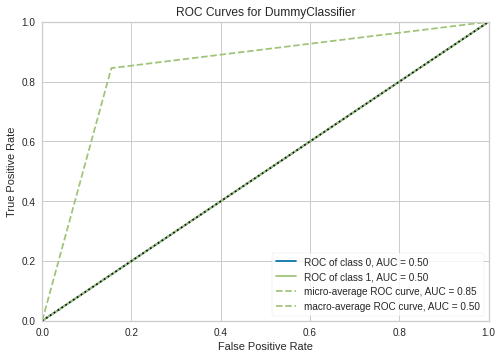

/home/wallece/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/wallece/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/wallece/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/wallece/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/

/home/wallece/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/wallece/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/wallece/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/wallece/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/home/wallece/.local/lib/python3.8/site-pa

In [14]:
#lr = create_model('lr')
# plotting a model
plot_model(melhores_modelos[0])

# Treinando o melhor modelo


In [20]:
# modeloDados = dadosSemVentilacao
# modeloDados = dadosSemUTI
# modeloDados = covidData
# modeloDados = dadosSemAmbos
# modeloDados = dadosComAmbos

alvo = 'evolucaoCaso'
modeloDados = pd.read_excel("rn-23-7030-2022.xlsx")

modeloDados['evolucaoCaso']= modeloDados['evolucaoCaso'].replace(['Óbito', 'Cura'], [0, 1])
modeloDados = modeloDados.drop(columns = 'condicoes')

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(modeloDados.drop(alvo,axis=1),
                                                    modeloDados[alvo],
                                                    test_size=0.3,
                                                    random_state=42);

In [22]:
from sklearn.ensemble import RandomForestClassifier

#classifier_rf = RandomForestClassifier(random_state=1986, n_estimators=45, criterion='gini', max_depth= 6, n_jobs=-1)

classifier_rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=8702, verbose=0,
                       warm_start=False)

classifier_rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=8702, verbose=0,
                       warm_start=False)

In [23]:
from sklearn.metrics import accuracy_score

#Realizando a predição
resultRF = classifier_rf.predict(x_test)

# Verificando a acurácia
print(accuracy_score(y_test, resultRF))

0.8207885304659498


In [25]:
# Verificando os melhores dados
from sklearn.ensemble import RandomForestClassifier

feature_importances = pd.DataFrame(classifier_rf.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
faixaetaria,0.465886
racaCor,0.068233
dorDeCabeca,0.057847
dorDeGarganta,0.054379
sexo,0.052865
coriza,0.052708
febre,0.048845
dispneia,0.048637
tosse,0.047722
diabetes,0.030500


In [26]:
from sklearn import metrics
print(metrics.classification_report(y_test,resultRF))

              precision    recall  f1-score   support

           0       0.65      0.39      0.49        61
           1       0.85      0.94      0.89       218

    accuracy                           0.82       279
   macro avg       0.75      0.67      0.69       279
weighted avg       0.80      0.82      0.80       279

